In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
#import the dataset
dataset=pd.read_csv("abalone.csv")

dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
dataset.shape

(4177, 9)

In [6]:
dataset['Age'] = dataset['Rings']+1.5
dataset = dataset.drop('Rings', axis=1)
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [7]:
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


**Data Analysis & Visualization**


**Univariate Analysis**

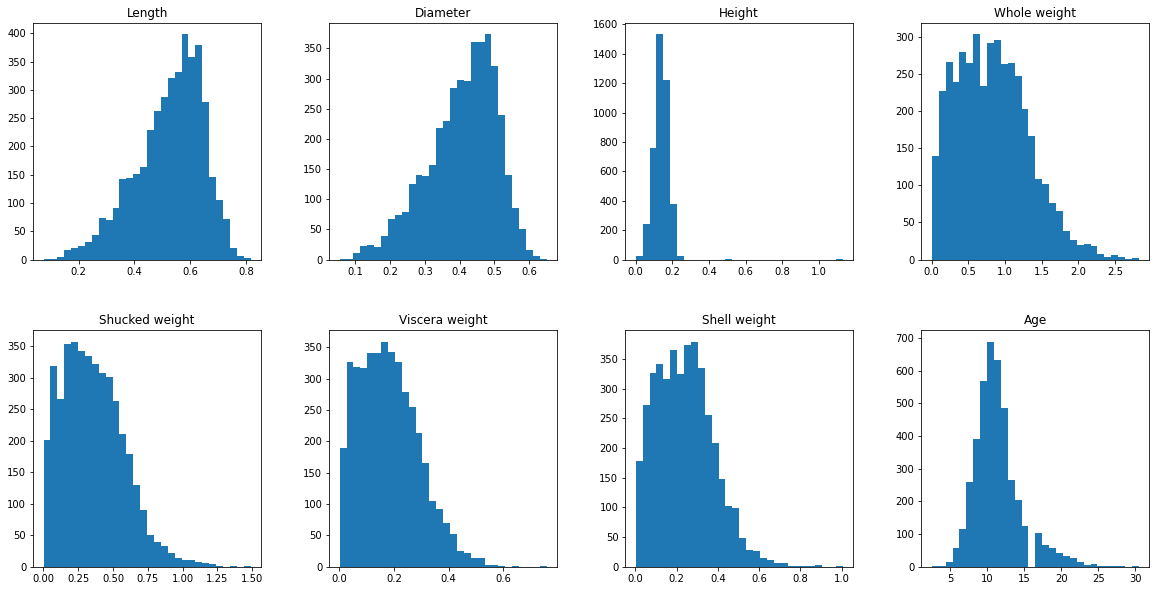

In [8]:
dataset.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)
plt.show()

In [9]:
Numerical = dataset.select_dtypes(include=[np.number]).columns
Categorical = dataset.select_dtypes(include=[np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [10]:
skew_values = skew(dataset[Numerical], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(Numerical), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


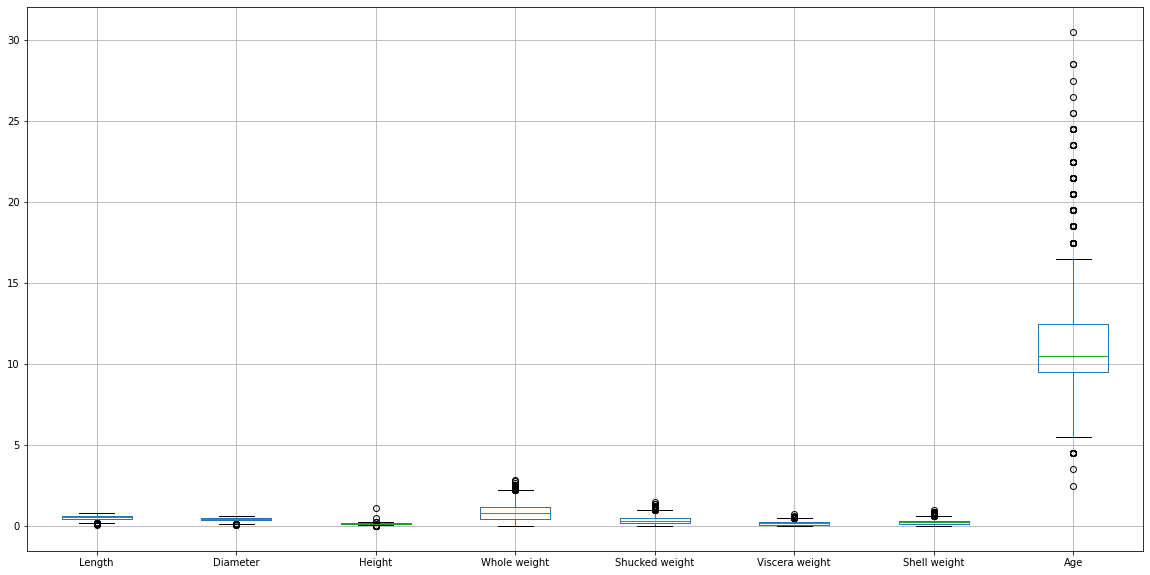

In [11]:
dataset.boxplot(figsize=(20,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


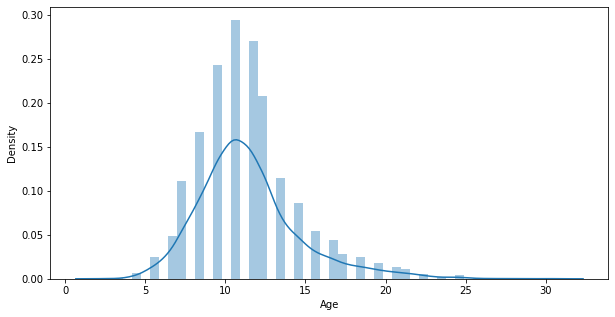

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(dataset['Age'])
plt.show()

**Bivariate Analysis**

In [13]:
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


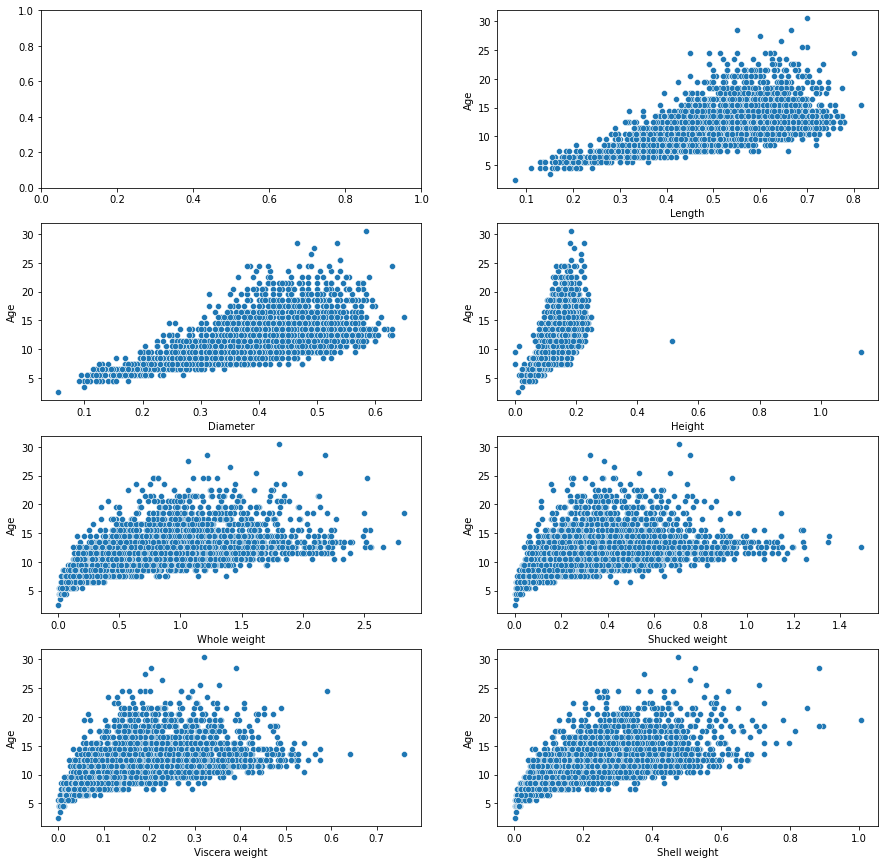

In [14]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.flatten()
for i in range(1,len(dataset.columns)-1):
    sns.scatterplot(x=dataset.iloc[:,i], y=dataset['Age'], ax=axes[i])
plt.show()

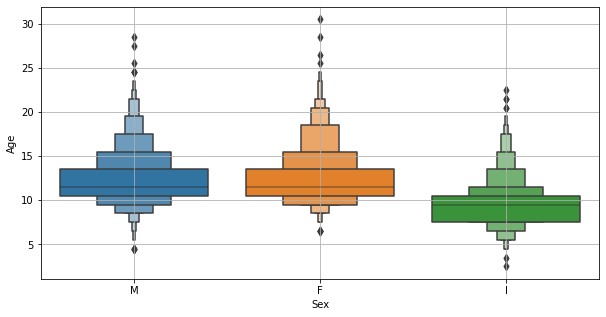

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,12.629304,3.104256,6.5,10.5,11.5,13.5,30.5
I,1342.0,9.390462,2.511554,2.5,7.5,9.5,10.5,22.5
M,1528.0,12.205497,3.026349,4.5,10.5,11.5,13.5,28.5


In [15]:
plt.figure(figsize=(10,5))
sns.boxenplot(y=dataset['Age'], x=dataset['Sex'])
plt.grid()
plt.show()
dataset.groupby('Sex')['Age'].describe()

**Multivariate Analysis**

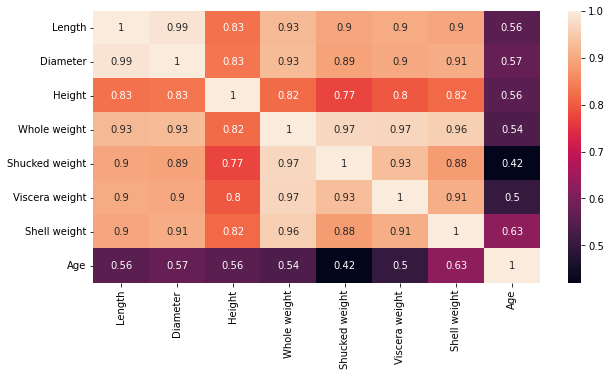

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

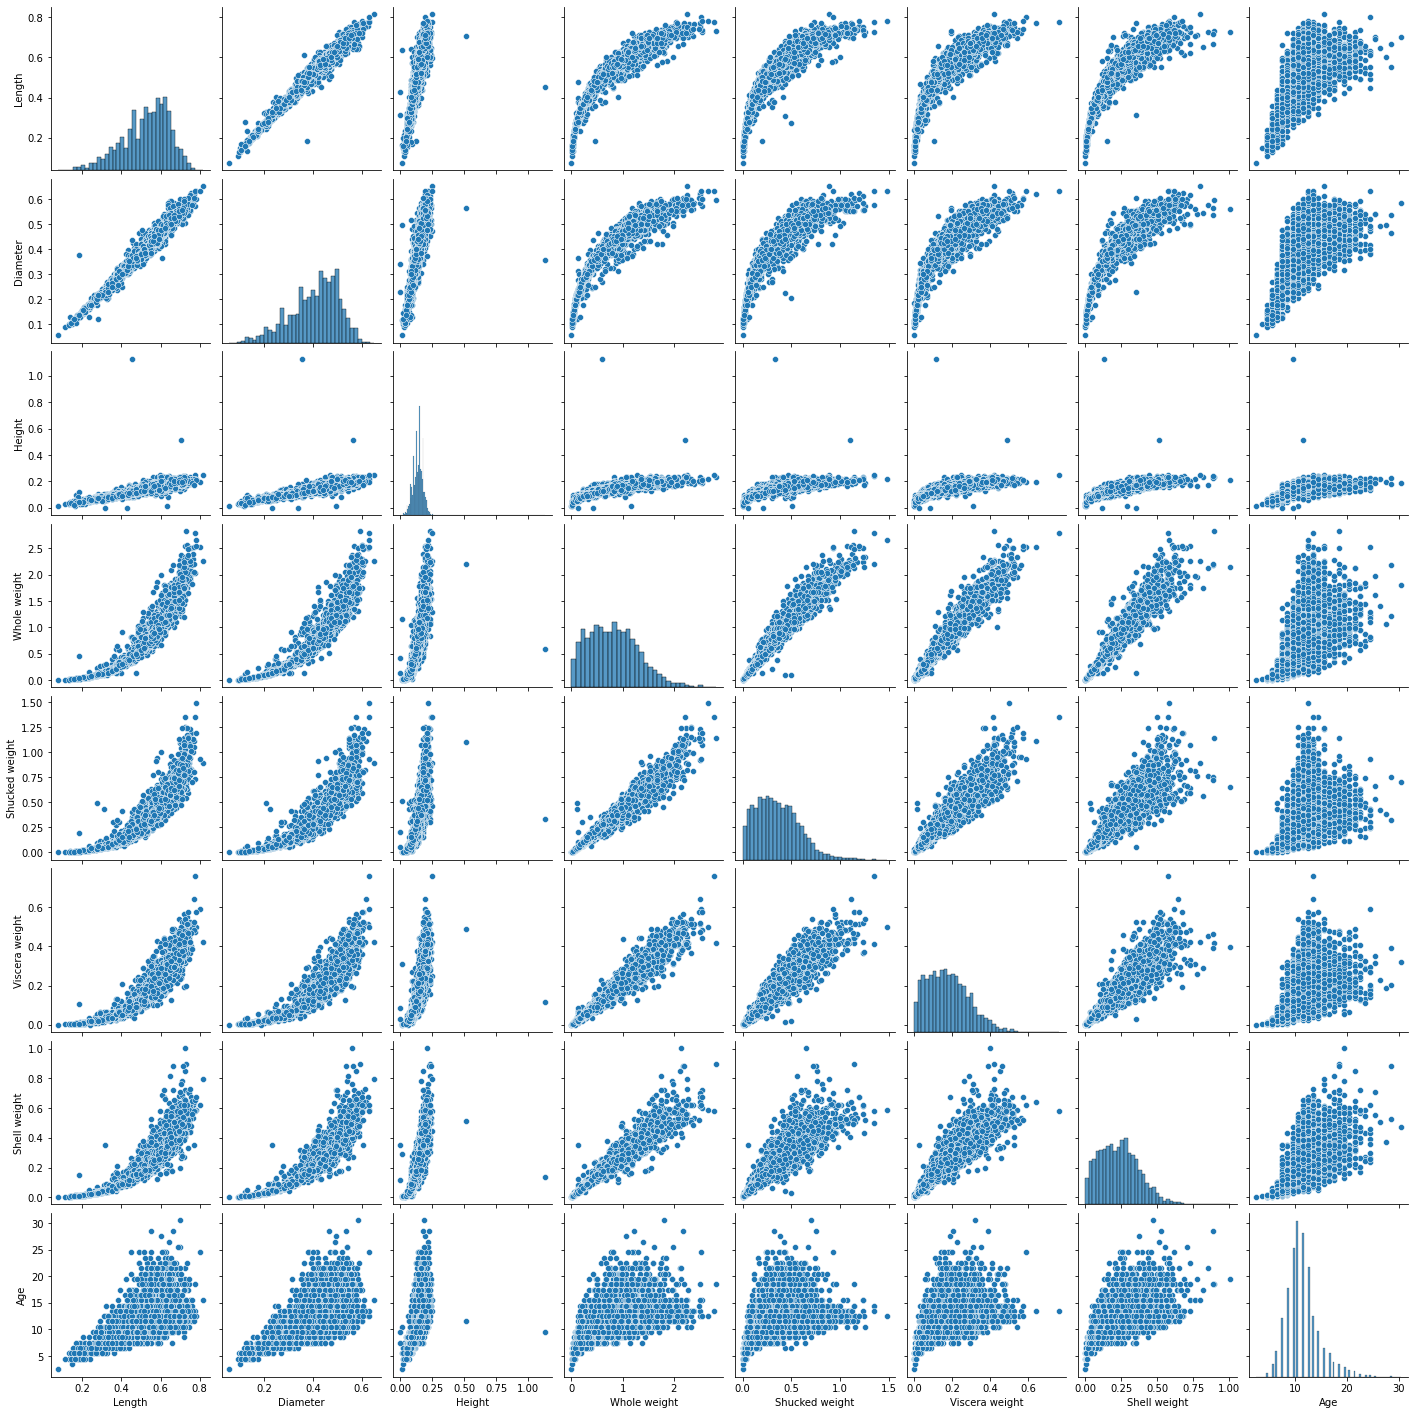

In [17]:
sns.pairplot(dataset)
plt.show()

**Descriptive statistics on the dataset**

In [18]:
#mean

dataset.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Age               11.433684
dtype: float64

In [19]:
# median

dataset.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Age               10.5000
dtype: float64

In [20]:
# mode

dataset.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,10.5
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Missing values and deal with them**

In [21]:
dataset.isna()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [22]:
dataset.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [23]:
#skewness

dataset.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


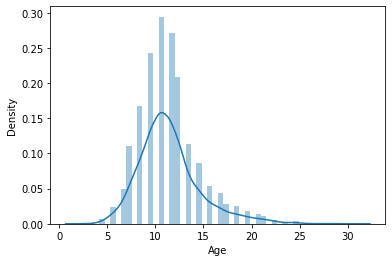

In [24]:
print(sns.distplot(dataset['Age']))

In [25]:
dataset.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Age                2.330687
dtype: float64

In [26]:
dataset.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Age               10.395266
dtype: float64

In [27]:
dataset.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Age               3.224169
dtype: float64

**Find the outliers and replace them outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


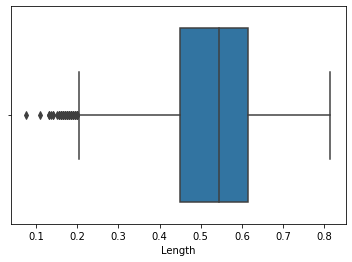

In [28]:
sns.boxplot(dataset['Length'])

In [29]:
qnt=dataset.quantile(q=(0.30,0.45))

qnt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.30,0.470,0.365,0.120,0.5083,0.2140,0.108,0.15,9.5
0.45,0.525,0.410,0.135,0.7241,0.3035,0.156,0.21,10.5


In [30]:
iqr =qnt.loc[0.45]-qnt.loc[0.30] #iqr calculation
iqr

Length            0.0550
Diameter          0.0450
Height            0.0150
Whole weight      0.2158
Shucked weight    0.0895
Viscera weight    0.0480
Shell weight      0.0600
Age               1.0000
dtype: float64

In [31]:
#lower extreme values
lower=qnt.loc[0.30]-1.5*iqr
lower

Length            0.38750
Diameter          0.29750
Height            0.09750
Whole weight      0.18460
Shucked weight    0.07975
Viscera weight    0.03600
Shell weight      0.06000
Age               8.00000
dtype: float64

In [32]:
#upper extreme values
upper=qnt.loc[0.45]+1.5*iqr
upper

Length             0.60750
Diameter           0.47750
Height             0.15750
Whole weight       1.04780
Shucked weight     0.43775
Viscera weight     0.22800
Shell weight       0.30000
Age               12.00000
dtype: float64

**Replacing the outlier**

In [33]:
dataset['Length']=np.where(dataset['Length']>45,31,dataset['Length'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


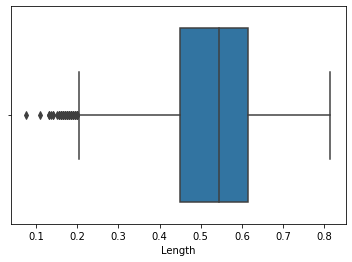

In [34]:
sns.boxplot(dataset['Length'])

**Check for Categorical columns and perform encoding**

In [35]:
dataset=pd.read_csv("abalone.csv")

dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [36]:
#manually handling the categorical columns

dataset['Sex'].replace( {'F':1,'M':0},inplace=True)

dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Split the data into dependent and independent variables**

In [37]:
#target variable

y=dataset['Height']
y.head()

0    0.095
1    0.090
2    0.135
3    0.125
4    0.080
Name: Height, dtype: float64

In [38]:
#independent

x=dataset.drop(columns=['Height'],axis=1)

x.head()

,Sex,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.2050,0.0895,0.0395,0.055,7


In [39]:
dataset=pd.get_dummies(dataset,columns=['Height'])

dataset.head()

,Sex,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Height_0.0,Height_0.01,...,Height_0.21,Height_0.215,Height_0.22,Height_0.225,Height_0.23,Height_0.235,Height_0.24,Height_0.25,Height_0.515,Height_1.13
0,0,0.455,0.365,0.5140,0.2245,0.1010,0.150,15,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.350,0.265,0.2255,0.0995,0.0485,0.070,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.530,0.420,0.6770,0.2565,0.1415,0.210,9,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.440,0.365,0.5160,0.2155,0.1140,0.155,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I,0.330,0.255,0.2050,0.0895,0.0395,0.055,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#encoding 
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Height_0.0,Height_0.01,Height_0.015,...,Height_0.22,Height_0.225,Height_0.23,Height_0.235,Height_0.24,Height_0.25,Height_0.515,Height_1.13,Sex_1,Sex_I
0,0.455,0.365,0.5140,0.2245,0.1010,0.150,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.350,0.265,0.2255,0.0995,0.0485,0.070,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.530,0.420,0.6770,0.2565,0.1415,0.210,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.440,0.365,0.5160,0.2155,0.1140,0.155,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.330,0.255,0.2050,0.0895,0.0395,0.055,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Scale the independent variables**

In [41]:
from sklearn.preprocessing import scale

In [ ]:
x=scale(x)

In [43]:
x

,Sex,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,1.0945,0.5310,0.2610,0.2960,10


In [44]:
x.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.523992
Diameter          0.407881
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [45]:
x.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.120093
Diameter          0.099240
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
dtype: float64

**Split the data into training and testing**

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
x_train.shape

(3341, 8)

In [49]:
x_test.shape

(836, 8)

In [50]:
y_train.shape

(3341,)

In [51]:
y_test.shape

(836,)

**Build the Model**

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
#initializing the DT

model=DecisionTreeClassifier()

In [54]:
#encoding 
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Height_0.0,Height_0.01,Height_0.015,...,Height_0.22,Height_0.225,Height_0.23,Height_0.235,Height_0.24,Height_0.25,Height_0.515,Height_1.13,Sex_1,Sex_I
0,0.455,0.365,0.5140,0.2245,0.1010,0.150,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.350,0.265,0.2255,0.0995,0.0485,0.070,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.530,0.420,0.6770,0.2565,0.1415,0.210,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.440,0.365,0.5160,0.2155,0.1140,0.155,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.330,0.255,0.2050,0.0895,0.0395,0.055,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
dataset.head()

,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Height_0.0,Height_0.01,Height_0.015,...,Height_0.22,Height_0.225,Height_0.23,Height_0.235,Height_0.24,Height_0.25,Height_0.515,Height_1.13,Sex_1,Sex_I
0,0.455,0.365,0.5140,0.2245,0.1010,0.150,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.350,0.265,0.2255,0.0995,0.0485,0.070,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.530,0.420,0.6770,0.2565,0.1415,0.210,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.440,0.365,0.5160,0.2155,0.1140,0.155,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.330,0.255,0.2050,0.0895,0.0395,0.055,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
X = dataset.drop('Height_0.24', axis=1)
y = dataset['Height_0.24']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [57]:
#Base model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_trains, y_train)
pred = lr.predict(X_tests)

from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 0.05396357808789086
The r2-score is: -3.0186556221228136


In [58]:
#selecting best feautre
from sklearn.feature_selection import RFE
lr = LinearRegression()
n = [{'n_features_to_select':list(range(1,10))}]
rfe = RFE(lr)

from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(rfe, param_grid=n, cv=3)
gsearch.fit(X, y)

gsearch.best_params_

{'n_features_to_select': 9}

In [59]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X,y)

pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Class'])

,Class
Length,47
Diameter,50
Whole weight,44
Shucked weight,45
Viscera weight,48
Shell weight,46
Rings,49
Height_0.0,43
Height_0.01,1
Height_0.015,38


**Performance of our Model using multiple Algorithms**

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict

models = [   SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4)]
results = []
names = ['SVM','Random Forest','Gradient Boost','K-Nearest Neighbors']
for model,name in zip(models,names):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    rmse = np.sqrt(mean_squared_error(y, cross_val_predict(model, X , y, cv=3)))
    results.append(rmse)
    names.append(name)
    msg = "%s: %f" % (name, rmse)
    print(msg)

SVM: 0.100907
Random Forest: 0.039286
Gradient Boost: 0.045938
K-Nearest Neighbors: 0.037303
